In [1]:
import pandas as pd

In [3]:
# Load data
df = pd.read_csv('sle_many_values.csv', sep = ';')
df

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),PRE (currently),CYC (total dose in grams),...,Complement c3 (g/l),Complement C4 (g/l),ANF (in debut),ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),CCI,CiRS (general),CIRS (severity index),Class
0,46,9,32,14,152.0,62.0,26.8,15,10.0,12.0,...,2.01,0.30,10240,320,48.5,4.2,2,7,1.75,0
1,51,12,28,23,162.0,78.0,29.7,30,20.0,100.0,...,1.03,0.19,1280,1280,8.2,60.0,3,6,1.50,0
2,40,7,20,20,158.0,80.0,32.0,60,10.0,26.0,...,0.94,0.11,1280,320,150.7,130.0,4,7,1.17,0
3,36,15,16,20,159.0,58.0,22.9,20,5.0,0.0,...,0.57,0.04,2560,640,67.0,0.0,1,3,3.00,0
4,34,14,14,20,164.0,62.0,23.0,55,5.0,3.0,...,0.86,0.20,640,1280,44.0,10.4,1,5,2.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,41,39,40,1,180.0,73.0,22.5,15,10.0,0.0,...,0.81,0.14,1280,640,21.0,70.0,2,3,3.00,1
125,49,20,47,2,172.0,62.0,20.9,15,12.5,0.0,...,0.88,0.11,1280,160,12.0,189.0,2,7,2.33,1
126,38,29,34,4,172.0,148.0,50.0,50,15.0,1.0,...,0.98,0.12,320,0,32.0,12.0,1,4,2.00,1
127,35,34,34,1,164.0,65.0,24.1,60,30.0,0.0,...,1.11,0.16,1280,160,305.0,17.7,1,4,2.00,1


In [12]:
for column in df.columns:
    print (column, '\n')
    print (df[column].describe())
    print ('\n')

Age at diagnosis 

count    129.000000
mean      27.310078
std        9.610215
min        7.000000
25%       19.000000
50%       27.000000
75%       34.000000
max       47.000000
Name: Age at diagnosis, dtype: float64


SLEDAI-2K 

count    129.000000
mean       5.147287
std        4.006052
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       17.000000
Name: SLEDAI-2K, dtype: float64


Anti-dsDNA (currently) 

count    129.000000
mean      93.716279
std       87.342240
min        0.000000
25%       12.200000
50%       59.000000
75%      200.000000
max      400.000000
Name: Anti-dsDNA (currently), dtype: float64


ANF (currently) 

count       129.000000
mean       7321.550388
std       20862.068691
min           0.000000
25%         160.000000
50%         640.000000
75%        2560.000000
max      163840.000000
Name: ANF (currently), dtype: float64


PRE (currently) 

count    129.000000
mean      13.139535
std       10.651525
min        0.000000
25

In [6]:
columns_for_new_df = ['Age at diagnosis', 'SLEDAI-2K', 'Anti-dsDNA (currently)', 'ANF (currently)', 'PRE (currently)']

In [7]:
df = df[columns_for_new_df]

In [8]:
df

,Age at diagnosis,SLEDAI-2K,Anti-dsDNA (currently),ANF (currently),PRE (currently)
0,32,0,4.2,320,10.0
1,28,6,60.0,1280,20.0
2,20,10,130.0,320,10.0
3,16,2,0.0,640,5.0
4,14,2,10.4,1280,5.0
...,...,...,...,...,...
124,40,7,70.0,640,10.0
125,47,4,189.0,160,12.5
126,34,2,12.0,0,15.0
127,34,12,17.7,160,30.0


In [463]:
df['ANF (currently)'].describe()

count       129.000000
mean       7321.550388
std       20862.068691
min           0.000000
25%         160.000000
50%         640.000000
75%        2560.000000
max      163840.000000
Name: ANF (currently), dtype: float64

In [405]:
df['ANF (currently)'] = df['ANF (currently)'] / 160

<ipython-input-405-70f665a74973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ANF (currently)'] = df['ANF (currently)'] / 160


In [343]:
df.loc[df['ANF (currently)'] >35].count()

Age at diagnosis    20
SLEDAI-2K           20
ANF (currently)     20
PRE (currently)     20
dtype: int64

In [344]:
df.loc[df['ANF (currently)'] > 35, 'ANF (currently)'] = 35

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
df.loc[:, 'Class'] = df['PRE (currently)'].apply(lambda x: 0 if x <= 7.5 else 1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
df.loc[:, 'ANF (currently)'] = df['ANF (currently)'].apply(lambda x: 0 if x <= 640 else 1)

In [15]:
df = df.drop(columns = 'PRE (currently)')

In [16]:
X = df.drop(columns = 'Class')
X

,Age at diagnosis,SLEDAI-2K,Anti-dsDNA (currently),ANF (currently)
0,32,0,4.2,0
1,28,6,60.0,1
2,20,10,130.0,0
3,16,2,0.0,0
4,14,2,10.4,1
...,...,...,...,...
124,40,7,70.0,0
125,47,4,189.0,0
126,34,2,12.0,0
127,34,12,17.7,0


In [468]:
df.loc[df['ANF (currently)'] == 1].count()

Age at diagnosis    61
SLEDAI-2K           61
Er (in debut)       61
ANF (currently)     61
Class               61
dtype: int64

In [17]:
y = df['Class']
y

0      1
1      1
2      1
3      0
4      0
      ..
124    1
125    1
126    1
127    1
128    0
Name: Class, Length: 129, dtype: int64

In [18]:
y.value_counts()

1    84
0    45
Name: Class, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 21)

In [483]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 19 to 34
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age at diagnosis  46 non-null     int64  
 1   SLEDAI-2K         46 non-null     int64  
 2   Er (in debut)     46 non-null     float64
 3   ANF (currently)   46 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 KB


In [29]:
from sklearn.preprocessing import StandardScaler

In [484]:
scaler = StandardScaler()

In [485]:
X_train_scaled = scaler.fit_transform(X_train)

In [486]:
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [487]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [488]:
log_reg.predict(X_train_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [489]:
log_reg.score(X_train_scaled, y_train)

0.7710843373493976

In [490]:
log_reg.score(X_test_scaled, y_test)

0.8043478260869565

In [505]:
from sklearn.metrics import precision_score

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.8


In [516]:
from sklearn.metrics import recall_score

# Assuming log_reg is your trained LogisticRegression model
# Assuming X_test and y_test are your test data

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print("Recall:", recall)

Recall: 0.9333333333333333


In [517]:
from sklearn.metrics import f1_score

# Assuming log_reg is your trained LogisticRegression model
# Assuming X_test and y_test are your test data

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the F1-score
print("F1-score:", f1)

F1-score: 0.8615384615384616


In [518]:
from sklearn.metrics import roc_auc_score

# Assuming log_reg is your trained LogisticRegression model
# Assuming X_test and y_test are your test data

# Make predictions on the test set probabilities
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC-ROC score
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8145833333333333


In [519]:
from sklearn.metrics import log_loss

# Assuming log_reg is your trained LogisticRegression model
# Assuming X_test and y_test are your test data

# Make predictions on the test set probabilities
y_pred_prob = log_reg.predict_proba(X_test_scaled)

# Calculate log loss
logloss = log_loss(y_test, y_pred_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.48589060090623426


In [520]:
from sklearn.metrics import confusion_matrix

# Assuming log_reg is your trained LogisticRegression model
# Assuming X_test and y_test are your test data

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Create a confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Print the specificity
print("Specificity:", specificity)

Specificity: 0.5625


In [521]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 9  7]
 [ 2 28]]


In [522]:
tn, fp, fn, tp = conf_matrix.ravel()
print (tn, fp, fn, tp)

9 7 2 28


In [513]:
log_reg1 = LogisticRegression(random_state = 0,
                              C = 0.9,
                              fit_intercept = True,
                             ).fit(X_train_scaled, y_train)

In [514]:
log_reg1.score(X_train_scaled, y_train)

0.7710843373493976

In [515]:
log_reg1.score(X_test_scaled, y_test)

0.8043478260869565

In [494]:
# Retrieve parameters
coefficients = log_reg.coef_
intercepts = log_reg.intercept_

# Print the parameters
print("Coefficients:", coefficients)
print("Intercepts:", intercepts)

Coefficients: [[ 0.63333382  1.17920952 -0.40638572  0.26400549]]
Intercepts: [0.92755501]


# Undersample for class 1

In [46]:
from sklearn.utils import resample

# Assuming df is your DataFrame with binary classes

# Separate the majority class and minority class
majority_class = df[df['Class'] == 1]
minority_class = df[df['Class'] == 0]

# Oversample the minority class
oversampled_minority = resample(minority_class,
                                replace=True,  # With replacement
                                n_samples=len(majority_class) - 20,  # Match majority class size
                                random_state=42)  # Set random state for reproducibility

# Combine the oversampled minority class and the majority class
oversampled_df = pd.concat([oversampled_minority, majority_class])

# Print the count of each class in the oversampled DataFrame
print(oversampled_df['Class'].value_counts())

1    84
0    64
Name: Class, dtype: int64


In [47]:
df1 = oversampled_df

In [68]:
X = df1.drop(columns = 'Class')

In [69]:
y = df1['Class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 51 to 117
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age at diagnosis        45 non-null     int64  
 1   SLEDAI-2K               45 non-null     int64  
 2   Anti-dsDNA (currently)  45 non-null     float64
 3   ANF (currently)         45 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 KB


In [51]:
y_test.value_counts()

1    28
0    17
Name: Class, dtype: int64

In [52]:
y_train.value_counts()

1    56
0    47
Name: Class, dtype: int64

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [54]:
log_reg.predict(X_train_scaled)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [55]:
log_reg.score(X_train_scaled, y_train)

0.7475728155339806

In [56]:
log_reg.score(X_test_scaled, y_test)

0.8888888888888888

In [57]:
from sklearn.metrics import precision_score

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.896551724137931


In [58]:
from sklearn.metrics import f1_score

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the F1-score
print("F1-score:", f1)

F1-score: 0.912280701754386


In [59]:
from sklearn.metrics import recall_score

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print("Recall:", recall)

Recall: 0.9285714285714286


In [60]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Create a confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Print the specificity
print("Specificity:", specificity)

Specificity: 0.8235294117647058


In [61]:
from sklearn.metrics import roc_auc_score

# Make predictions on the test set probabilities
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC-ROC score
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8970588235294117


In [62]:
from sklearn.metrics import log_loss

# Make predictions on the test set probabilities
y_pred_prob = log_reg.predict_proba(X_test_scaled)

# Calculate log loss
logloss = log_loss(y_test, y_pred_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.4450081903627312


In [74]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14  3]
 [ 2 26]]


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

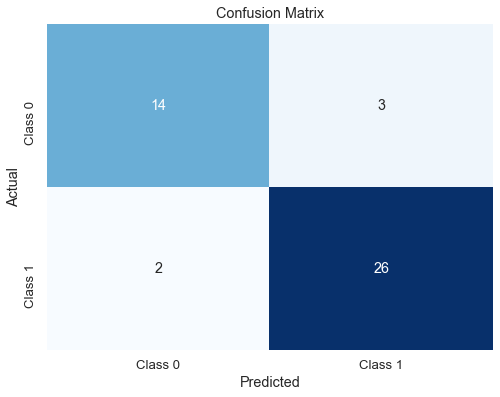

In [75]:
# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [64]:
# Retrieve parameters
coefficients = log_reg.coef_
intercepts = log_reg.intercept_

# Print the parameters
print("Coefficients:", coefficients)
print("Intercepts:", intercepts)

Coefficients: [[0.51491513 0.78037869 0.26949064 0.36336054]]
Intercepts: [0.26440086]


In [65]:
x_check = X
x_check

,Age at diagnosis,SLEDAI-2K,Anti-dsDNA (currently),ANF (currently)
95,35,2,124.0,0
72,27,2,200.0,0
32,24,2,7.8,1
121,21,0,4.2,0
19,22,5,62.0,1
...,...,...,...,...
122,46,6,200.0,1
124,40,7,70.0,0
125,47,4,189.0,0
126,34,2,12.0,0


In [66]:
x_check_scaled = scaler.transform(x_check)

In [67]:
# Make predictions on the test set
y_pred = log_reg.predict(x_check_scaled)

# Create a confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[49 15]
 [16 68]]


In [705]:
log_reg1 = LogisticRegression(random_state = 0,
                              C = 0.3,
                              fit_intercept = True,
                             ).fit(X_train_scaled, y_train)

In [701]:
log_reg1.score(X_train_scaled, y_train)

0.7087378640776699

In [702]:
log_reg1.score(X_test_scaled, y_test)

0.8666666666666667

In [630]:
# Make predictions on the test set
y_pred = log_reg1.predict(X_test_scaled)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[23 14]
 [ 5 26]]


In [77]:
import numpy as np

# Save the mean and standard deviation to variables
mean_values = scaler.mean_
std_values = np.sqrt(scaler.var_)

# Save the mean and standard deviation to a file (you can use any preferred format)
with open("normalization_params.txt", "w") as f:
    for mean, std in zip(mean_values, std_values):
        f.write(f"{mean},{std}\n")


In [ ]:
# During prediction in another program:
# Load the mean and standard deviation from the file
mean_values_loaded = []
std_values_loaded = []

with open("normalization_params.txt", "r") as f:
    for line in f:
        mean, std = line.strip().split(",")
        mean_values_loaded.append(float(mean))
        std_values_loaded.append(float(std))

mean_values_loaded = np.array(mean_values_loaded)
std_values_loaded = np.array(std_values_loaded)

# Normalize the new example (assuming it's in X_new, a 1D array with shape [num_features])
X_new_normalized = (X_new - mean_values_loaded) / std_values_loaded

# Use your logistic model to predict the binary class for the new example based on X_new_normalized.

# Predict for new examples 

In [86]:
import numpy as np

# Coefficients and intercept
coefficients = np.array([0.51491513, 0.78037869, 0.26949064, 0.36336054])
intercept = np.array([0.26440086])

# Normalization parameters
mean_values = np.array([27.223300970873787, 4.650485436893204, 83.80388349514566, 0.42718446601941745])
std_values = np.array([9.942487078078907, 3.69126162520489, 86.01066531555992, 0.4946694836060969])

# New examples (replace with your actual values)
new_examples = np.array([
    [14, 6, 100.4, 1]  # Replace with your actual values
    # ... add more new examples if needed
])

# Normalize the new examples using the provided normalization parameters
normalized_new_examples = (new_examples - mean_values) / std_values

# Calculate the linear combination of features and coefficients
linear_combination = np.dot(normalized_new_examples, coefficients) + intercept

# Apply the logistic function to get the predicted probabilities
predicted_probabilities = 1 / (1 + np.exp(-linear_combination))

# Convert predicted probabilities to predicted classes (0 or 1)
predicted_classes = np.round(predicted_probabilities)

print(int(predicted_classes))


1


In [82]:
df

,Age at diagnosis,SLEDAI-2K,Anti-dsDNA (currently),ANF (currently),Class
0,32,0,4.2,0,1
1,28,6,60.0,1,1
2,20,10,130.0,0,1
3,16,2,0.0,0,0
4,14,2,10.4,1,0
...,...,...,...,...,...
124,40,7,70.0,0,1
125,47,4,189.0,0,1
126,34,2,12.0,0,1
127,34,12,17.7,0,1
